# ASTROPLAN usage 
Determining if my Brown Dwarf targets are visible from GIANO
September 2016


In [29]:
import astroplan
from astroplan import Observer
from astroplan import FixedTarget
from astropy.time import Time
from astroplan.plots import plot_airmass 
import matplotlib.pyplot as plt 
import numpy as np

In [30]:
Period_times = ["2017-04-05 00:00:00", "2017-07-01 00:00:00", "2017-10-25 00:00:00"]   # start, middle, end
Targets = ["HD211847", "HD162020", "HD168443", "HD202206", "HD4747", "HD30501", "HD167665"]

giano = Observer.at_site("roque de los Muchachos")

Start new calculation
Date = 2017-04-05 00:00:00
Sunset time = 2017-04-04 19:27:33.298
Sunrise time = 2017-04-05 07:00:35.709


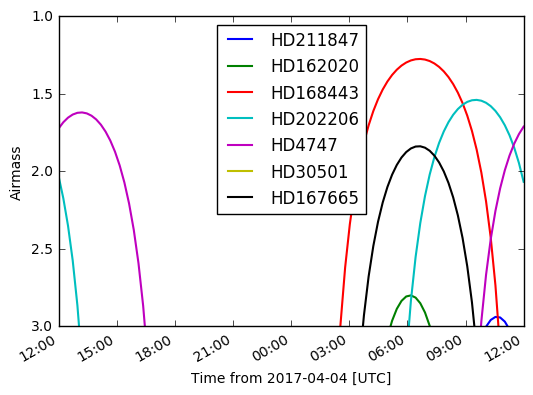

Start new calculation
Date = 2017-07-01 00:00:00
Sunset time = 2017-06-30 20:09:29.665
Sunrise time = 2017-07-01 06:21:15.175


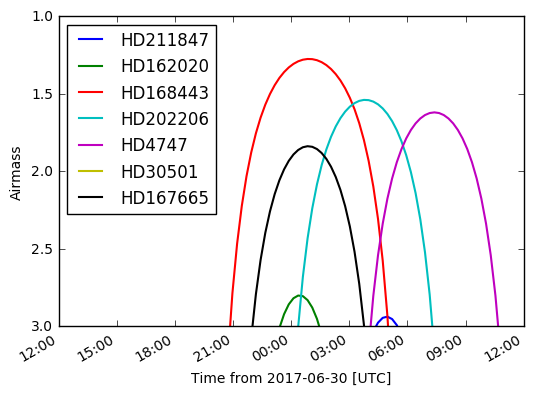

Start new calculation
Date = 2017-10-25 00:00:00


Sunset time = 2017-10-24 18:28:51.041
Sunrise time = 2017-10-25 07:22:50.834


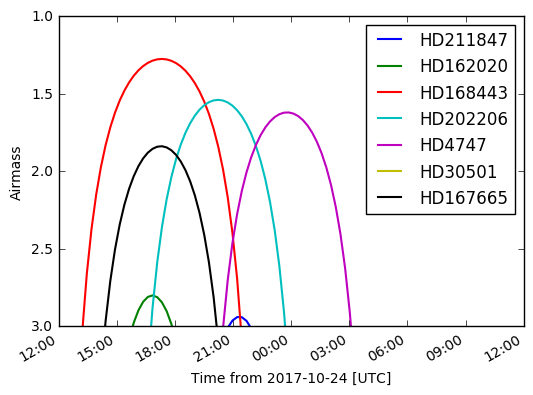

In [32]:
for T in Period_times:
    # Analyse each target at this time.
    time = Time(T)
    print("Start new calculation")
    print("Date = {}".format(T))
    sunset_time = giano.sun_set_time(time, which='nearest')
    sunrise_time = giano.sun_rise_time(time, which='nearest')
    print("Sunset time = {}".format(sunset_time.iso))
    print("Sunrise time = {}".format(sunrise_time.iso))
   
    for Target in Targets:
        #During this time determine if this target is up and observable
        target = FixedTarget.from_name(Target)
        target_rise = giano.target_rise_time(time, target)
        target_set = giano.target_set_time(time, target)
        target_meridian = giano.target_meridian_transit_time(time, target)
        # Calculate when they are up at night time
        # I just plotted the airmass and used that as a guide for targets.
        
        plot_airmass(target, giano, time)
        
    plt.legend(loc=0)
    plt.show()
                

# Use plot_sky
to plot the motions over each night


Start new calculation
Date = 2017-04-05 00:00:00
Sunset time = 2017-04-04 19:27:33.298
Sunrise time = 2017-04-05 07:00:35.709


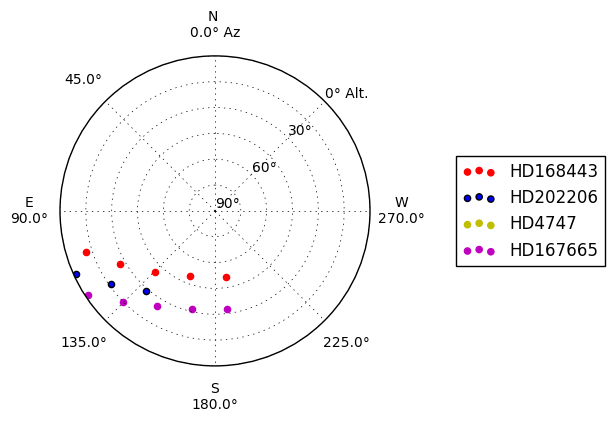

Start new calculation
Date = 2017-07-01 00:00:00
Sunset time = 2017-06-30 20:09:29.665
Sunrise time = 2017-07-01 06:21:15.175


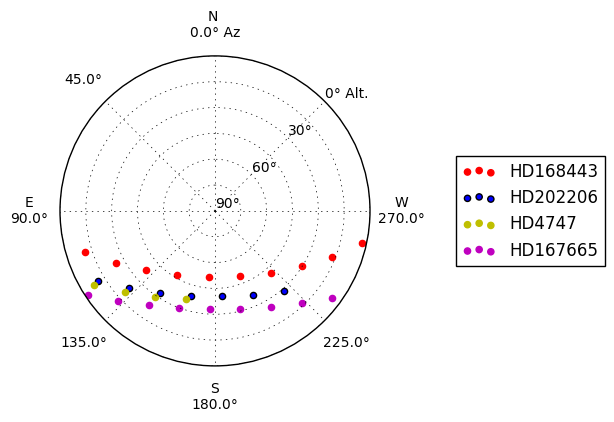

Start new calculation
Date = 2017-10-25 00:00:00


Sunset time = 2017-10-24 18:28:51.041
Sunrise time = 2017-10-25 07:22:50.834


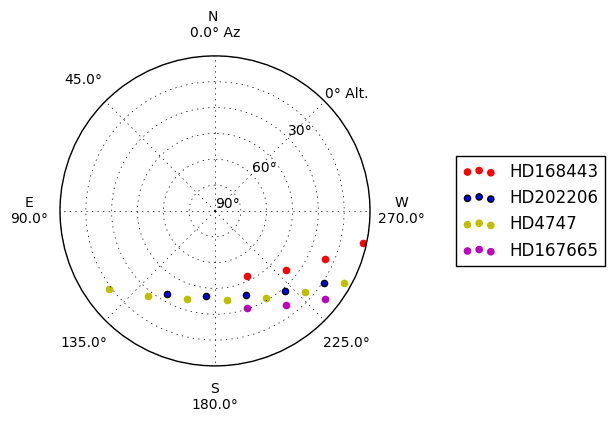

In [28]:
from astroplan.plots import plot_sky

style443 = {'color': 'r'}
style206 = {'color': 'g'}
style747 = {'color': 'y'}
style665 = {'color': 'm'}

p443 = FixedTarget.from_name("HD168443")
p206 = FixedTarget.from_name("HD202206")
p747 = FixedTarget.from_name("HD4747") 
p665 = FixedTarget.from_name("HD167665")

for T in Period_times:
    # Analyse each target at this time.
    time = Time(T)
    print("Start new calculation")
    print("Date = {}".format(T))
    sunset_time = giano.sun_set_time(time, which='nearest')
    sunrise_time = giano.sun_rise_time(time, which='nearest')
    print("Sunset time = {}".format(sunset_time.iso))
    print("Sunrise time = {}".format(sunrise_time.iso))
    
    time_window = sunset_time + (sunrise_time - sunset_time) * np.linspace(0, 1, 10)

    plot_sky(p443, giano, time_window, style_kwargs=style443)  
    plot_sky(p206, giano, time_window)  
    plot_sky(p747, giano, time_window, style_kwargs=style747)  
    plot_sky(p665, giano, time_window, style_kwargs=style665)
    plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))  
    plt.show() 

From this it shows that the targets are better to observe in the latter part of the observation run.
The three plots are for the begining middle and end.
None of that targets get very high though